<h1>Lesson 1. kNN on Iris dataset</h1>

Student: Rodolfo Lerma

<table>
  <tr>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/56/Kosaciec_szczecinkowaty_Iris_setosa.jpg/180px-Kosaciec_szczecinkowaty_Iris_setosa.jpg" style="width:250px; height:200px;"></td>
    <td><img src="https://www.math.umd.edu/~petersd/666/html/iris_with_labels.jpg" width="250px"></td>
    <td><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/9f/Iris_virginica.jpg/295px-Iris_virginica.jpg" width="250px"></td>
  </tr>
</table>
  
  <p>This exercise relates to the <a href="https://en.wikipedia.org/wiki/Iris_flower_data_set">iris data set</a>,
which contains the morphologic variation of Iris flowers of three related species (Iris setosa, Iris virginica and Iris versicolor).</p>
<p>Four features were measured from each observation (see image above):</p>
<ul>
<li>Sepal.Length - sepal length in centimeters</li>
<li>Sepal.Width - sepal width in centimeters</li>
<li>Petal.Length - petal length in centimeters</li>
<li>Petal.Width - petal width in centimeters</li>
<li>Species - species of the flower (our outcome variable)</li>
</ul>
<p>scikit-learn comes with a few small standard datasets that do not require to download any file from some external website.</p>
<p>You can check the documentation <a href="http://scikit-learn.org/stable/datasets/index.html">here</a></p>
<p>This dataset is built in under variable 'iris'. Let's see how it looks:</p>

In [1]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

iris = load_iris()

In [2]:
df_iris = pd.DataFrame(iris.data, columns = iris.feature_names)
df_iris['target'] = iris.target

In [3]:
df_iris.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Q.0.1 Print the object type of iris</h3>

In [4]:
# Put the command (or commands) here that would give the answer to the above question
print("The data type for the Iris input data is: " + str(iris.data.dtype))
print("The data type for the Iris target variable is: " + str(iris.target.dtype))

The data type for the Iris input data is: float64
The data type for the Iris target variable is: int32


In [5]:
df_iris.dtypes

sepal length (cm)    float64
sepal width (cm)     float64
petal length (cm)    float64
petal width (cm)     float64
target                 int32
dtype: object

This confirms the datatype for each of the variables see before.

<h3>Q.0.2 What do the iris.target_names represent</h3>

In [6]:
print(list(iris.target_names))

['setosa', 'versicolor', 'virginica']


In [7]:
#Describe what the iris.target_names represent

The `iris.target_names` represent a list of with the names of 3 species/classes of Iris flowers:
- iris-setosa
- iris-versicolor
- iris-virginica

These are the variables that will be used as targets for our model later on.

<h3>Q.0.3 What do the iris.feature_names represent</h3>

In [8]:
print(list(iris.feature_names))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [9]:
#Describe what the iris.feature_names represent

The `iris.feature_names` represent a list of with the 4 features/characteristics measured for each of the instances on the data frame. Basically they represent 4 measurments of different Iris flowers in centimenters:
- sepal length (cm)
- sepal length (cm)
- petal length (cm)
- petal width (cm)

These are the features/columns that will be used as input for our model later on.

In [10]:
# print the integers representing the species of each observation
print (iris.target)
data = pd.DataFrame(iris.data)
data.columns = iris.feature_names
data['label'] = iris.target
data.head()

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<h3>Q.1. How many observations are present for each species?</h3>

In [11]:
# Put the command (or commands) here that would give an answer to the above question.
print('The number of observation per type of Iris flower is as follows:')
print(data['label'].value_counts())

The number of observation per type of Iris flower is as follows:
2    50
1    50
0    50
Name: label, dtype: int64


As written in the description of the dataset we have an even distribution of each type of Iris flower in this data frame.

In [12]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),label
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

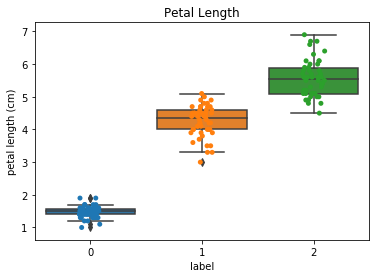

In [14]:
#Petal length
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='petal length (cm)',data=data).set_title('Petal Length')
fig=sns.stripplot(x='label',y='petal length (cm)',data=data,jitter=True,edgecolor='gray')

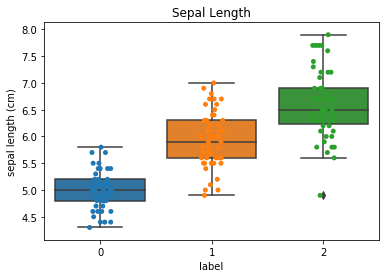

In [15]:
#Sepal length
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='sepal length (cm)',data=data).set_title('Sepal Length')
fig=sns.stripplot(x='label',y='sepal length (cm)',data=data,jitter=True,edgecolor='gray')

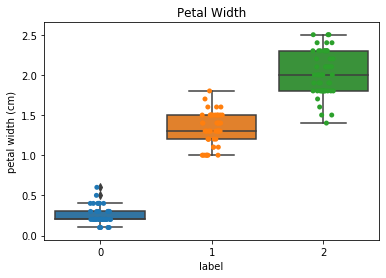

In [16]:
#petal width
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='petal width (cm)',data=data).set_title('Petal Width')
fig=sns.stripplot(x='label',y='petal width (cm)',data=data,jitter=True,edgecolor='gray')

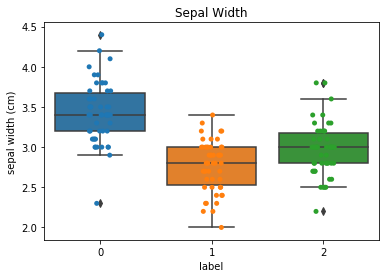

In [17]:
#Sepal width
fig=plt.gcf()
fig.set_size_inches(6,4)
fig=sns.boxplot(x='label',y='sepal width (cm)',data=data).set_title('Sepal Width')
fig=sns.stripplot(x='label',y='sepal width (cm)',data=data,jitter=True,edgecolor='gray')

From the plots above it is possible to see how the `petal` data offers a clearer distinction between the types of flowers compared to the `sepal` input (length & width).

<h3>Q.2. Plot the Sepal.Width vs. Sepal.Length, Petal.Width vs. Petal.Length, while color-coding the species.</h3> 

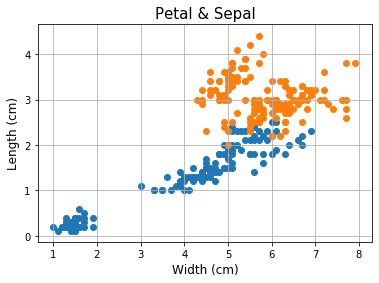

In [18]:
#Length Vs Width (Petal & Sepal)
plt.scatter(data['petal length (cm)'], data['petal width (cm)'])
plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'])
plt.title('Petal & Sepal', fontsize = 15)
plt.xlabel('Width (cm)', fontsize = 12)
plt.ylabel('Length (cm)', fontsize = 12)
plt.grid()
plt.show()

In [19]:
# #create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
# cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
# plt.scatter(data['petal length (cm)'], data['petal width (cm)'], c = data['label'].map(cmap_bold))
# plt.title('Petal', fontsize = 15)
# plt.xlabel('Width (cm)', fontsize = 12)
# plt.ylabel('Length (cm)', fontsize = 12)
# plt.grid()
# plt.show()

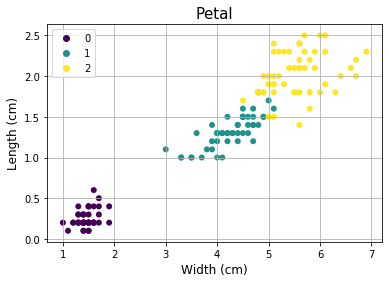

In [20]:
#create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sc = plt.scatter(data['petal length (cm)'], data['petal width (cm)'],
                 c=data['label'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)),label=i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data['label'])]
plt.title('Petal', fontsize = 15)
plt.xlabel('Width (cm)', fontsize = 12)
plt.ylabel('Length (cm)', fontsize = 12)
plt.legend(handles=handles)
plt.grid()
plt.show()

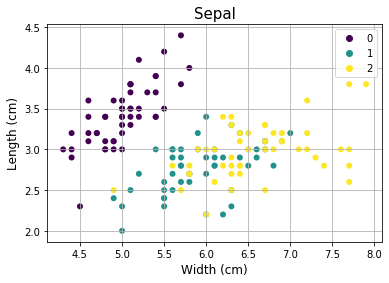

In [21]:
#create a scatter plot of PETAL LENGTH versus PETAL WIDTH and color by SPECIES
sc = plt.scatter(data['sepal length (cm)'], data['sepal width (cm)'],
                 c=data['label'], edgecolors='none')

lp = lambda i: plt.plot([],color=sc.cmap(sc.norm(i)),label=i, ls="", marker="o")[0]
handles = [lp(i) for i in np.unique(data['label'])]
plt.title('Sepal', fontsize = 15)
plt.xlabel('Width (cm)', fontsize = 12)
plt.ylabel('Length (cm)', fontsize = 12)
plt.legend(handles=handles)
plt.grid()
plt.show()

<h3>Q.3. Which of the plots allows for easier determination of the flower type?</h3>

It is possible to see that the **`Petal length Vs width`** offers an easier way to indentify/determine the type of Iris flower that we are looking at.

<br>
<p>After the initial exploratory data analysis.</p>

<h3>Q.4. Write the command to split the data into 70% train and 30% test, to prepare for k-NN modelling:</h3>

In [22]:
from sklearn.model_selection import train_test_split

# first split the dataset into its attributes and labels
X = data.iloc[:, :-1].values  
y = data.iloc[:, 4].values  

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

<h3>Q.5. Write the Python command that performs k-NN fit using Petal.Width and Petal.Length only using 2 neighbors.</h3>

In [23]:
from sklearn.neighbors import KNeighborsClassifier

# Instantiate learning model (k = 3)
clf = KNeighborsClassifier(n_neighbors=3)

# Fitting the model
clf.fit(X_train, y_train)

# Predicting the Test set results
y_pred = clf.predict(X_test)

<h3>Q.6. Evaluate your algorithm using the confusion_matrix and classification_report methods of the sklearn.metrics</h3>

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score 

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))  

Confusion Matrix
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]


In [25]:
print("Classification Report")
print(classification_report(y_test, y_pred))

Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



In [26]:
print("Accuracy Score with K = 3")
print(accuracy_score(y_test, y_pred))

Accuracy Score with K = 3
1.0


<h3>Q.7. What accuracy did you obtain?</h3>

An accuracy of 100%

<h3>Q.8. Try with different values of k (3 and 5), do you observe any difference in your result? Explain.</h3>

In [27]:
# Instantiate learning model (k = 5)
clf5 = KNeighborsClassifier(n_neighbors=5)
clf5.fit(X_train, y_train)
y_pred5 = clf5.predict(X_test)
print("Accuracy Score with K = 5")
print(accuracy_score(y_test, y_pred5))

Accuracy Score with K = 5
1.0


In [28]:
# Instantiate learning model (k = 45)
clf45 = KNeighborsClassifier(n_neighbors=45)
clf45.fit(X_train, y_train)
y_pred45 = clf45.predict(X_test)
print("Accuracy Score with K = 45")
print(accuracy_score(y_test, y_pred45))

Accuracy Score with K = 45
0.9777777777777777


In [29]:
# Instantiate learning model (k = 45)
clf65 = KNeighborsClassifier(n_neighbors=65)
clf65.fit(X_train, y_train)
y_pred65 = clf65.predict(X_test)
print("Accuracy Score with K = 65")
print(accuracy_score(y_test, y_pred65))

Accuracy Score with K = 65
0.5111111111111111


I tried K = 5, 45 & 65 to see what would happen and if the accuracy would change at all. From this I noticed that accuracy did not change until a K = 40 or more which could potentially tell me that either the model is able to capture the different features very well (the differences are well defined) and uses that information to determine the type of flower, or the model is too flexible and captures all the variations seen in the data (basically is over fitting).


This align with the theory covered in class where 

<h3>Q.9. List three methods that can be used to improve prediction quality</h3>

**3 methods given by the notebook:**

- Choosing the most applicable set of variables
- Choosing an optimal value for k for kNN
- Not overfitting the data in general

**Another 3 options:**

- Looking for the optional hyper parameters (hyper parameters tunning).
    - *For this we can use grid search or random search*
- Make sure we are not overfitting the model and the model can generalized well.
    - *Cross validation* 
- Explore the data to see if a better feature selection would help with the simplification of the model

<h3>Q.10. Create a new text cell in your Notebook: Complete a 50-100 word summary 
    (or short description of your thinking in applying this week's learning to the solution) 
     of your experience in this assignment. Include:

<br>                                                                       
- What was your incoming experience with this model, if any?
- what steps you took, what obstacles you encountered.
- how you link this exercise to real-world, machine learning problem-solving. (What steps were missing? What else do you need to learn?)


This summary allows your instructor to know how you are doing and allot points for your effort in thinking and planning, and making connections to real-world work.
</h3>

I do not have much machine learning experience, but in the past I have worked briefly with this data set and the non-parametric algorithm k-nearest neighbors. But given the data set and the clearly differentiable features and groupings that we can see when the data is plot is not surprised that the knn model was able to identify the different kind of species relatively fast. 
Usually for any kind of problem my approach is to first explore the data, if needed and possible do a feature selection. Then start asking questions about the relationships that are seen (if any) in the data, from there understand what machine learning algorithm would be best suitable and finally experiment with different variations of the model (or different models) until a reasonable good solution is found (after looking at the performance of the model).